# Story of the Olympic Games in Heatmaps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
athletes_data = pd.read_csv("athlete_events.csv")
athletes_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
summer_olympics = athletes_data[athletes_data["Season"] == "Summer"]
summer_olympics

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN


In [5]:
athletes_by_sport = summer_olympics.groupby(["Year", "Sport"]).size().reset_index(name="Count")
athletes_by_sport

,Year,Sport,Count
0,1896,Athletics,106
1,1896,Cycling,41
2,1896,Fencing,15
3,1896,Gymnastics,97
4,1896,Shooting,65
...,...,...,...
667,2016,Triathlon,110
668,2016,Volleyball,283
669,2016,Water Polo,258
670,2016,Weightlifting,255


Text(87.0, 0.5, 'Sport')

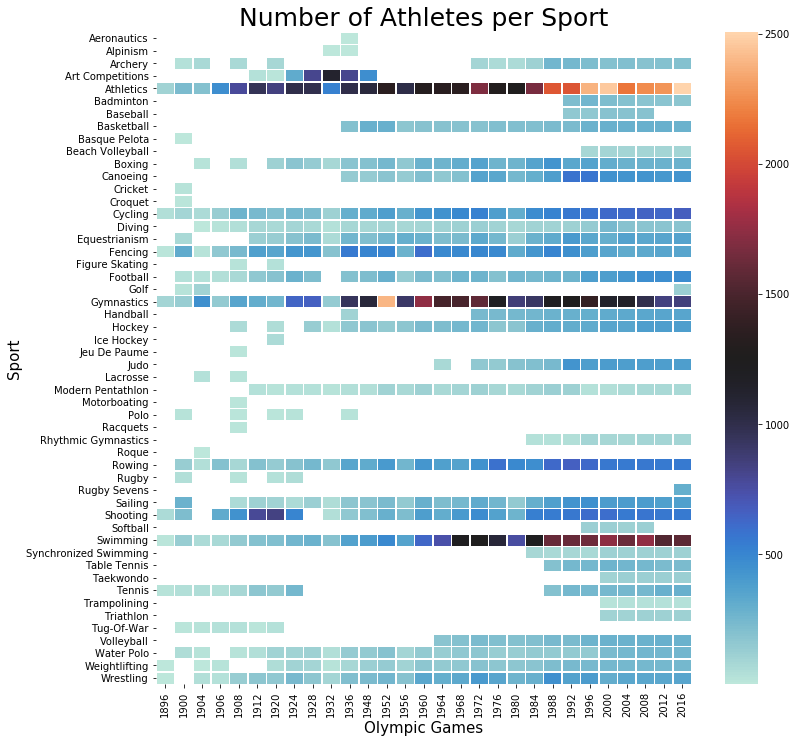

In [6]:
fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(athletes_by_sport.pivot("Sport", "Year", "Count"), linewidths=.5, cmap="icefire")
plt.title("Number of Athletes per Sport", fontsize=25)
plt.xlabel("Olympic Games", fontsize=15)
plt.ylabel("Sport", fontsize=15)

In [7]:
athletes_by_sport_by_noc = summer_olympics.groupby(["Year", "Sport", "NOC"]).size().reset_index(name="Count")
countries_per_sport_by_year = pd.pivot_table(athletes_by_sport_by_noc, index=["Year", "Sport"], columns="NOC", aggfunc="count").reset_index()
countries_per_sport_by_year["Countries"] = countries_per_sport_by_year["Count"].count(axis=1)
countries_per_sport_by_year

Year          Sport Count                                ...              \
NOC                        AFG AHO  ALB  ALG AND ANG ANT ANZ  ... VIN VNM WIF   
0    1896      Athletics   NaN NaN  NaN  NaN NaN NaN NaN NaN  ... NaN NaN NaN   
1    1896        Cycling   NaN NaN  NaN  NaN NaN NaN NaN NaN  ... NaN NaN NaN   
2    1896        Fencing   NaN NaN  NaN  NaN NaN NaN NaN NaN  ... NaN NaN NaN   
3    1896     Gymnastics   NaN NaN  NaN  NaN NaN NaN NaN NaN  ... NaN NaN NaN   
4    1896       Shooting   NaN NaN  NaN  NaN NaN NaN NaN NaN  ... NaN NaN NaN   
..    ...            ...   ...  ..  ...  ...  ..  ..  ..  ..  ...  ..  ..  ..   
667  2016      Triathlon   NaN NaN  NaN  NaN NaN NaN NaN NaN  ... NaN NaN NaN   
668  2016     Volleyball   NaN NaN  NaN  NaN NaN NaN NaN NaN  ... NaN NaN NaN   
669  2016     Water Polo   NaN NaN  NaN  NaN NaN NaN NaN NaN  ... NaN NaN NaN   
670  2016  Weightlifting   NaN NaN  1.0  1.0 NaN NaN NaN NaN  ... NaN NaN NaN   
671  2016      Wrestling   NaN NaN  NaN  1.0 NaN NaN NaN NaN  ... NaN NaN NaN   

                            Countries  
NOC YAR YEM YMD YUG ZAM ZIM            
0   NaN NaN NaN NaN NaN NaN         9  
1   NaN NaN NaN NaN NaN NaN         5  
2   NaN NaN NaN NaN NaN NaN         4  
3   NaN NaN NaN NaN NaN NaN         8  
4   NaN NaN NaN NaN NaN NaN         7  
..   ..  ..  ..  ..  ..  ..       ...  
667 NaN NaN NaN NaN NaN NaN        42  
668 NaN NaN NaN NaN NaN NaN        19  
669 NaN NaN NaN NaN NaN NaN        14  
670 NaN NaN NaN NaN NaN NaN        92  
671 NaN NaN NaN NaN NaN NaN        66  

[672 rows x 233 columns]

Text(87.0, 0.5, 'Sport')

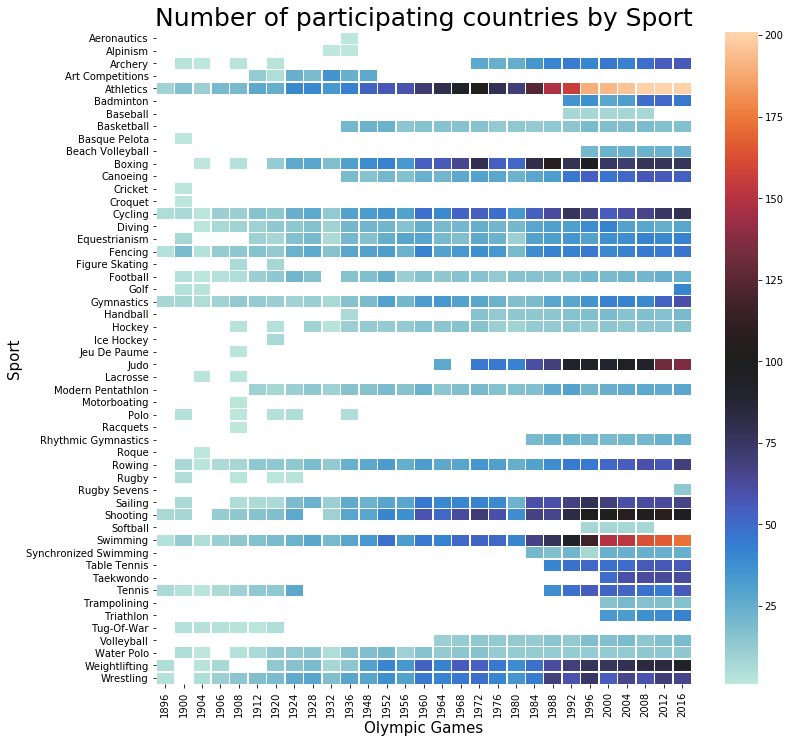

In [8]:
fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(countries_per_sport_by_year.pivot("Sport", "Year", "Countries"), linewidths=.5, cmap="icefire")
plt.title("Number of participating countries by Sport", fontsize=25)
plt.xlabel("Olympic Games", fontsize=15)
plt.ylabel("Sport", fontsize=15)

In [9]:
medallists = summer_olympics[summer_olympics["Medal"].notna()]
medallists.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold


In [10]:
medallists_by_sport_by_noc = medallists.groupby(["Year", "Sport", "NOC"]).size().reset_index(name="Count")
medalling_countries_per_sport_by_year = pd.pivot_table(medallists_by_sport_by_noc, index=["Year", "Sport"], columns="NOC", aggfunc="count").reset_index()
medalling_countries_per_sport_by_year["Countries"] = medalling_countries_per_sport_by_year["Count"].count(axis=1)
medalling_countries_per_sport_by_year

Year          Sport Count                                 ...           \
NOC                        AFG AHO ALG ANZ ARG  ARM  AUS  AUT  ... URU  USA   
0    1896      Athletics   NaN NaN NaN NaN NaN  NaN  1.0  NaN  ... NaN  1.0   
1    1896        Cycling   NaN NaN NaN NaN NaN  NaN  NaN  1.0  ... NaN  NaN   
2    1896        Fencing   NaN NaN NaN NaN NaN  NaN  NaN  NaN  ... NaN  NaN   
3    1896     Gymnastics   NaN NaN NaN NaN NaN  NaN  NaN  NaN  ... NaN  NaN   
4    1896       Shooting   NaN NaN NaN NaN NaN  NaN  NaN  NaN  ... NaN  1.0   
..    ...            ...   ...  ..  ..  ..  ..  ...  ...  ...  ...  ..  ...   
667  2016      Triathlon   NaN NaN NaN NaN NaN  NaN  NaN  NaN  ... NaN  1.0   
668  2016     Volleyball   NaN NaN NaN NaN NaN  NaN  NaN  NaN  ... NaN  1.0   
669  2016     Water Polo   NaN NaN NaN NaN NaN  NaN  NaN  NaN  ... NaN  1.0   
670  2016  Weightlifting   NaN NaN NaN NaN NaN  1.0  NaN  NaN  ... NaN  1.0   
671  2016      Wrestling   NaN NaN NaN NaN NaN  1.0  NaN  NaN  ... NaN  1.0   

                                 Countries  
NOC  UZB VEN VIE WIF YUG ZAM ZIM            
0    NaN NaN NaN NaN NaN NaN NaN         7  
1    NaN NaN NaN NaN NaN NaN NaN         5  
2    NaN NaN NaN NaN NaN NaN NaN         3  
3    NaN NaN NaN NaN NaN NaN NaN         3  
4    NaN NaN NaN NaN NaN NaN NaN         3  
..   ...  ..  ..  ..  ..  ..  ..       ...  
667  NaN NaN NaN NaN NaN NaN NaN         4  
668  NaN NaN NaN NaN NaN NaN NaN         5  
669  NaN NaN NaN NaN NaN NaN NaN         5  
670  1.0 NaN NaN NaN NaN NaN NaN        20  
671  1.0 NaN NaN NaN NaN NaN NaN        27  

[672 rows x 150 columns]

Text(87.0, 0.5, 'Sport')

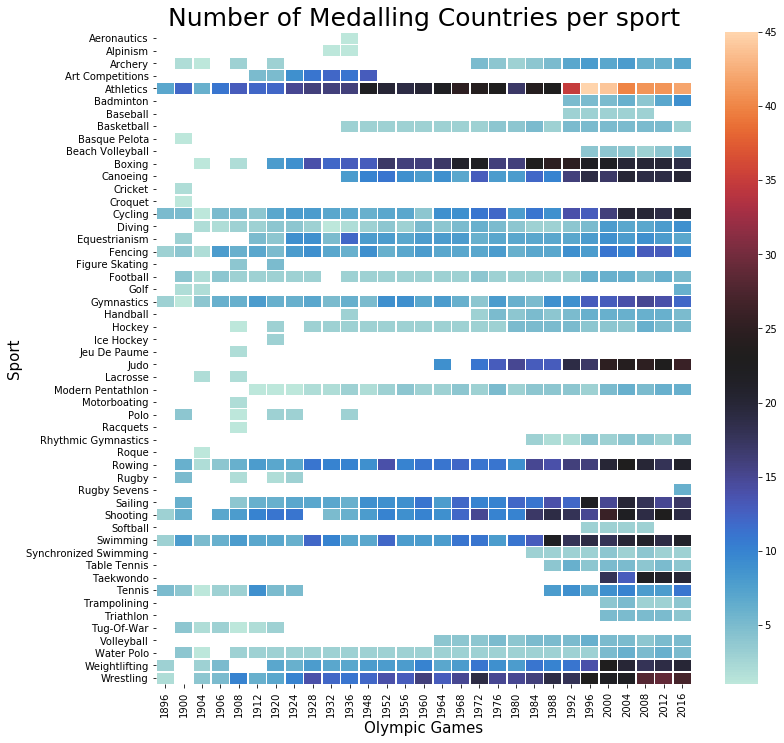

In [11]:
fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(medalling_countries_per_sport_by_year.pivot("Sport", "Year", "Countries"), linewidths=.5, cmap="icefire")
plt.title("Number of Medalling Countries per sport", fontsize=25)
plt.xlabel("Olympic Games", fontsize=15)
plt.ylabel("Sport", fontsize=15)

In [12]:
event_by_sports_data = summer_olympics.groupby(by=["Year", "Sport", "Event"]).size().reset_index(name="Count")
event_by_sports_data_by_year = pd.pivot_table(event_by_sports_data, index=["Year", "Sport"], columns="Event", aggfunc="count").reset_index()
event_by_sports_data_by_year["Events"] = event_by_sports_data_by_year["Count"].count(axis=1)
event_by_sports_data_by_year

Year          Sport                         Count  \
Event                      Aeronautics Mixed Aeronautics   
0      1896      Athletics                           NaN   
1      1896        Cycling                           NaN   
2      1896        Fencing                           NaN   
3      1896     Gymnastics                           NaN   
4      1896       Shooting                           NaN   
..      ...            ...                           ...   
667    2016      Triathlon                           NaN   
668    2016     Volleyball                           NaN   
669    2016     Water Polo                           NaN   
670    2016  Weightlifting                           NaN   
671    2016      Wrestling                           NaN   

                                                                    \
Event Alpinism Mixed Alpinism Archery Men's Au Chapelet, 33 metres   
0                         NaN                                  NaN   
1                         NaN                                  NaN   
2                         NaN                                  NaN   
3                         NaN                                  NaN   
4                         NaN                                  NaN   
..                        ...                                  ...   
667                       NaN                                  NaN   
668                       NaN                                  NaN   
669                       NaN                                  NaN   
670                       NaN                                  NaN   
671                       NaN                                  NaN   

                                            \
Event Archery Men's Au Chapelet, 50 metres   
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
..                                     ...   
667                                    NaN   
668                                    NaN   
669                                    NaN   
670                                    NaN   
671                                    NaN   

                                               \
Event Archery Men's Au Cordon Dore, 33 metres   
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
..                                        ...   
667                                       NaN   
668                                       NaN   
669                                       NaN   
670                                       NaN   
671                                       NaN   

                                               \
Event Archery Men's Au Cordon Dore, 50 metres   
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
..                                        ...   
667                                       NaN   
668                                       NaN   
669                                       NaN   
670                                       NaN   
671                                       NaN   

                                                                          ...  \
Event Archery Men's Championnat Du Monde Archery Men's Continental Style  ...   
0                                    NaN                             NaN  ...   
1                                    NaN                             NaN  ...   
2                                    NaN                             NaN  ...   
3                                  

Text(87.0, 0.5, 'Sport')

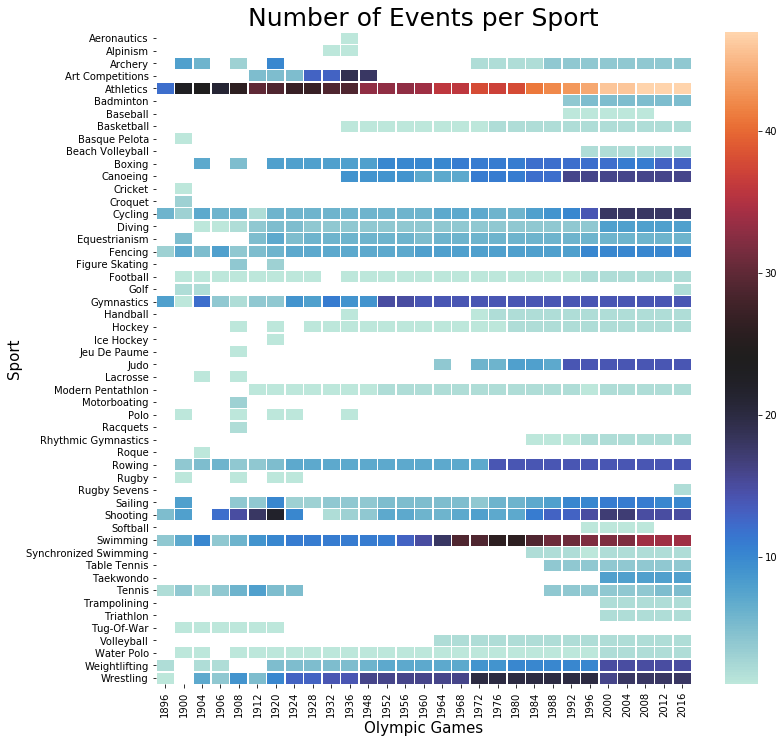

In [13]:
fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(event_by_sports_data_by_year.pivot("Sport", "Year", "Events"), linewidths=.5, cmap="icefire")
plt.title("Number of Events per Sport", fontsize=25)
plt.xlabel("Olympic Games", fontsize=15)
plt.ylabel("Sport", fontsize=15)

In [14]:
athletes_per_event_dict = {
    "Year": event_by_sports_data_by_year["Year"],
    "Sport": event_by_sports_data_by_year["Sport"],
    "Participants": np.array(athletes_by_sport["Count"]),
    "Events": np.array(event_by_sports_data_by_year["Events"])
}
athletes_per_event_dict["Participants per event"] = athletes_per_event_dict["Participants"] / athletes_per_event_dict["Events"]
athletes_per_event = pd.DataFrame.from_dict(athletes_per_event_dict)
athletes_per_event

,Year,Sport,Participants,Events,Participants per event
0,1896,Athletics,106,12,8.833333
1,1896,Cycling,41,6,6.833333
2,1896,Fencing,15,3,5.000000
3,1896,Gymnastics,97,8,12.125000
4,1896,Shooting,65,5,13.000000
...,...,...,...,...,...
667,2016,Triathlon,110,2,55.000000
668,2016,Volleyball,283,2,141.500000
669,2016,Water Polo,258,2,129.000000
670,2016,Weightlifting,255,15,17.000000


Text(87.0, 0.5, 'Sport')

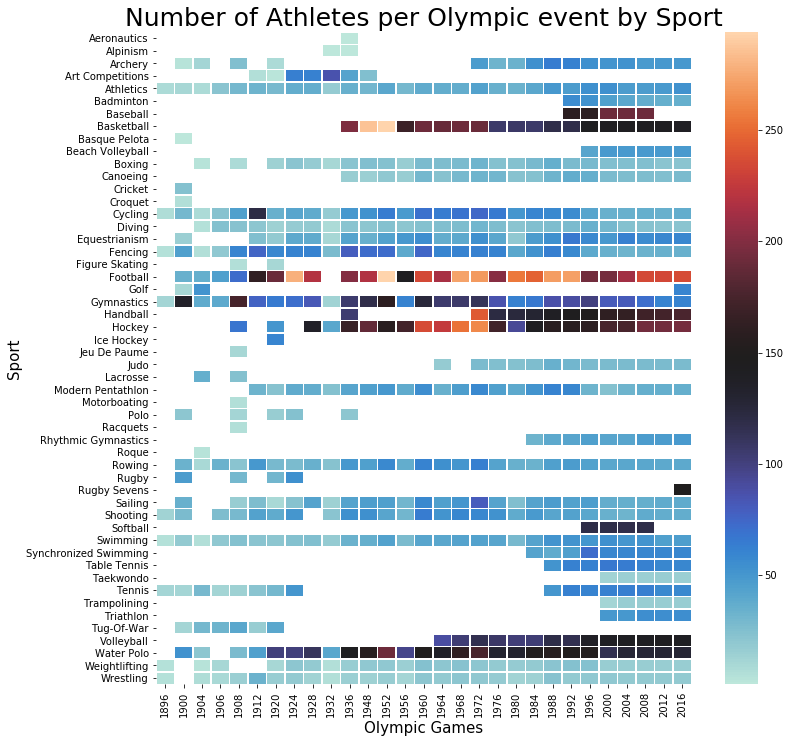

In [15]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(athletes_per_event.pivot("Sport", "Year", "Participants per event"), linewidths=.5, cmap="icefire")
plt.title("Number of Athletes per Olympic event by Sport", fontsize=25)
plt.xlabel("Olympic Games", fontsize=15)
plt.ylabel("Sport", fontsize=15)

Text(87.0, 0.5, 'Sport')

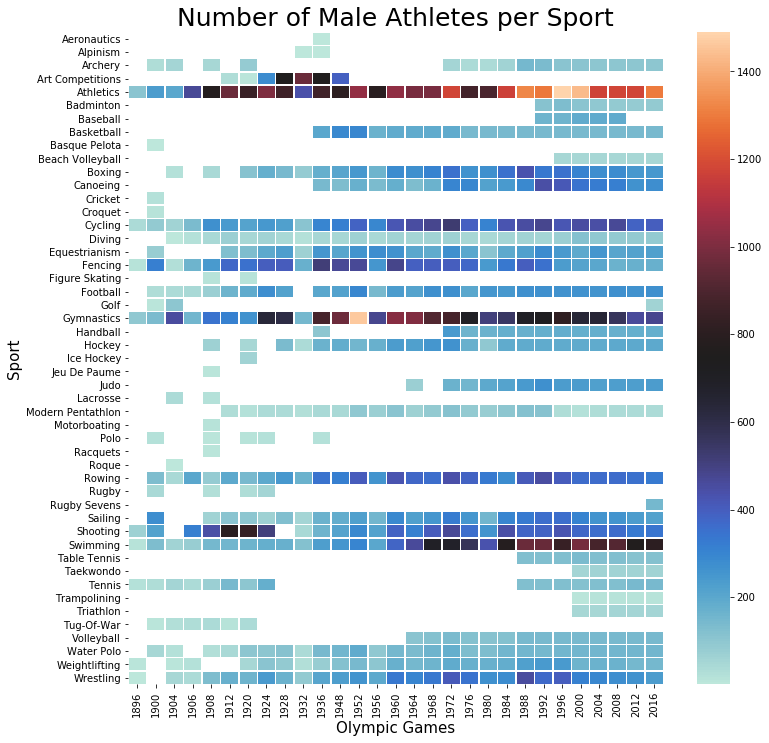

In [16]:
male_athletes_by_sport = summer_olympics[summer_olympics["Sex"] == "M"].groupby(["Year", "Sport"]).size().reset_index(name="Count")
fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(male_athletes_by_sport.pivot("Sport", "Year", "Count"), linewidths=.5, cmap="icefire")
plt.title("Number of Male Athletes per Sport", fontsize=25)
plt.xlabel("Olympic Games", fontsize=15)
plt.ylabel("Sport", fontsize=15)

Text(87.0, 0.5, 'Sport')

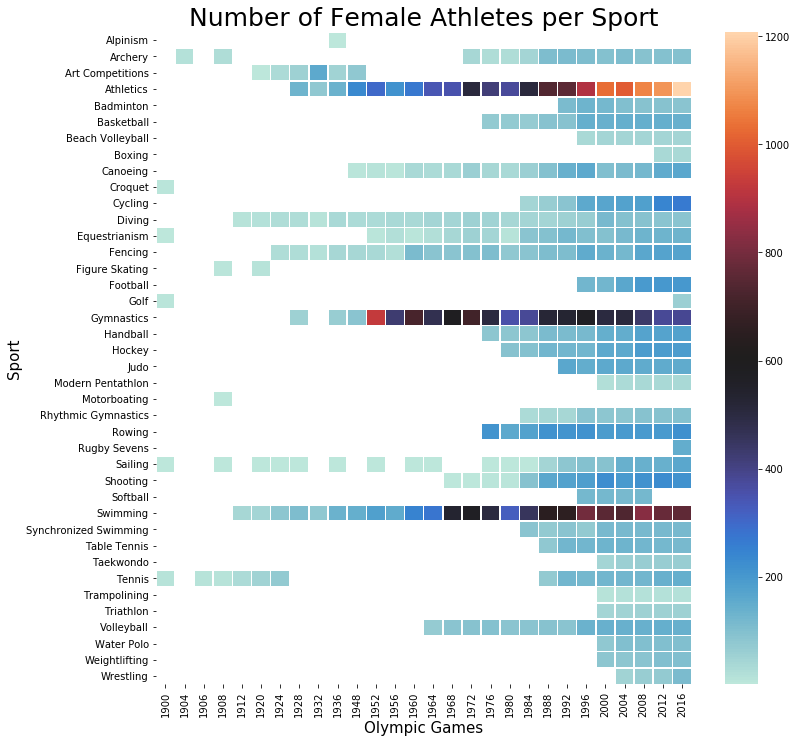

In [17]:
female_athletes_by_sport = summer_olympics[summer_olympics["Sex"] == "F"].groupby(["Year", "Sport"]).size().reset_index(name="Count")
fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(female_athletes_by_sport.pivot("Sport", "Year", "Count"), linewidths=.5, cmap="icefire")
plt.title("Number of Female Athletes per Sport", fontsize=25)
plt.xlabel("Olympic Games", fontsize=15)
plt.ylabel("Sport", fontsize=15)